In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
iris_X, iris_y = load_iris(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split( iris_X, iris_y, test_size=0.25, random_state=0)

# HAVING FUN MESSING AROUND WITH TSNE

In [3]:
tsneModel = TSNE(n_components=2, perplexity=50, learning_rate=100, n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_X_train = tsneModel.fit_transform(X_train)
tsne_X_test = tsneModel.fit_transform(X_test)

[t-SNE] Computing 111 nearest neighbors...
[t-SNE] Indexed 112 samples in 0.000s...
[t-SNE] Computed neighbors for 112 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 112 / 112
[t-SNE] Mean sigma: 1.289382
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.823151
[t-SNE] KL divergence after 1250 iterations: 0.033270
[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 38 samples in 0.000s...
[t-SNE] Computed neighbors for 38 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 38 / 38
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.816910
[t-SNE] KL divergence after 700 iterations: 0.545299


In [4]:
model_ovr_tsne = make_pipeline(StandardScaler(), LinearSVC())
model_ovr_tsne = model_ovr_tsne.fit(tsne_X_train, y_train)

In [5]:
model_ovo_tsne = make_pipeline(StandardScaler(), OneVsOneClassifier(LinearSVC()))
model_ovo_tsne = model_ovo_tsne.fit(tsne_X_train, y_train)

In [6]:
model_ovr_tsne.predict(tsne_X_test)

array([0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0,
       1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1])

<AxesSubplot:>

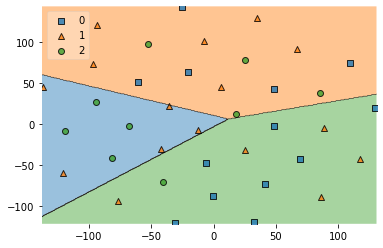

In [7]:
plot_decision_regions(tsne_X_test, y_test, model_ovr_tsne, legend=2)

In [8]:
model_ovo_tsne.predict(tsne_X_test)

array([0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0,
       0, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1])

<AxesSubplot:>

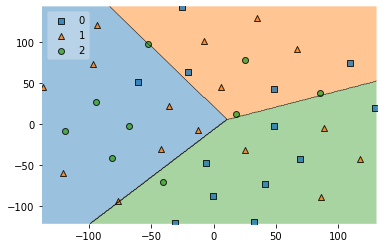

In [9]:
plot_decision_regions(tsne_X_test, y_test, model_ovo_tsne, legend=2)

In [10]:
model_neigh_tsne = KNeighborsClassifier(n_neighbors=3)
model_neigh_tsne = model_neigh_tsne.fit(tsne_X_train, y_train)

<AxesSubplot:>

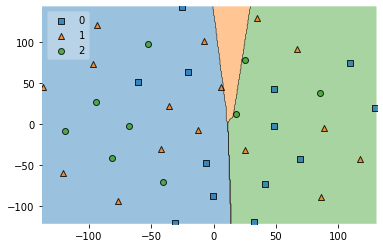

In [11]:
plot_decision_regions(tsne_X_test, y_test, model_neigh_tsne, legend=2)

# GOING (SERIOUSLY) BACK TO WORK !

In [12]:
X_train_sepal = X_train[:, [0,1]]
X_train_petal = X_train[:, [2,3]]
X_test_sepal = X_test[:, [0,1]]
X_test_petal = X_test[:, [2,3]]

In [13]:
model_ovr_sepal = make_pipeline(StandardScaler(), LinearSVC())
model_ovr_sepal = model_ovr_sepal.fit(X_train_sepal, y_train)

In [14]:
model_ovr_petal = make_pipeline(StandardScaler(), LinearSVC())
model_ovr_petal = model_ovr_petal.fit(X_train_petal, y_train)

In [15]:
model_ovo_sepal = make_pipeline(StandardScaler(), OneVsOneClassifier(LinearSVC()))
model_ovo_sepal = model_ovo_sepal.fit(X_train_sepal, y_train)

In [16]:
model_ovo_petal = make_pipeline(StandardScaler(), OneVsOneClassifier(LinearSVC()))
model_ovo_petal = model_ovo_petal.fit(X_train_petal, y_train)

In [17]:
model_ovr_sepal.predict(X_test_sepal)

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1])

<AxesSubplot:>

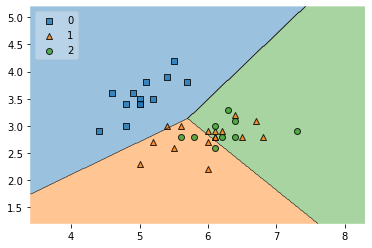

In [18]:
plot_decision_regions(X_test_sepal, y_test, model_ovr_sepal, legend=2)

In [19]:
model_ovr_petal.predict(X_test_petal)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

<AxesSubplot:>

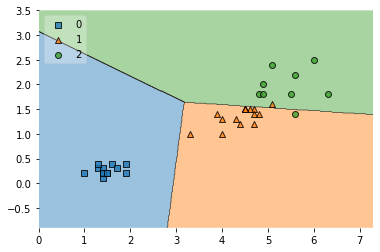

In [20]:
plot_decision_regions(X_test_petal, y_test, model_ovr_petal, legend=2)

In [21]:
model_ovo_sepal.predict(X_test_sepal)

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1])

<AxesSubplot:>

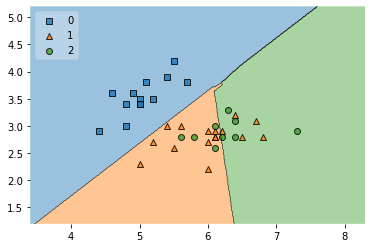

In [22]:
plot_decision_regions(X_test_sepal, y_test, model_ovo_sepal, legend=2)

In [23]:
model_ovo_sepal.predict(X_test_petal)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

<AxesSubplot:>

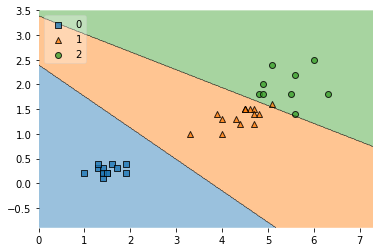

In [24]:
plot_decision_regions(X_test_petal, y_test, model_ovo_petal, legend=2)

In [48]:
test_model_neigh_sepal = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 75)}#use gridsearch to test all values for n_neighbors
test_model_neigh_sepal_gscv = GridSearchCV(test_model_neigh_sepal, param_grid, cv=3)#fit model to data
test_model_neigh_sepal_gscv.fit(X_train_sepal, y_train)
test_model_neigh_sepal_gscv.best_params_

{'n_neighbors': 28}

In [26]:
model_neigh_sepal = KNeighborsClassifier(n_neighbors=40)
model_neigh_sepal = model_neigh_sepal.fit(X_train_sepal, y_train)

In [27]:
model_neigh_sepal.predict(X_test_sepal)

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1])

<AxesSubplot:>

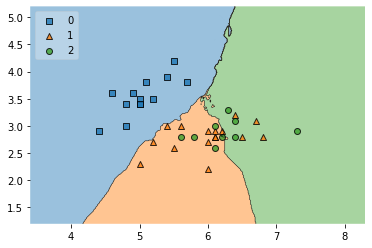

In [28]:
plot_decision_regions(X_test_sepal, y_test, model_neigh_sepal, legend=2)

In [29]:
test_model_neigh_petal = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 90)}#use gridsearch to test all values for n_neighbors
test_model_neigh_petal_gscv = GridSearchCV(test_model_neigh_petal, param_grid, cv=5)#fit model to data
test_model_neigh_petal_gscv.fit(X_train_petal, y_train)
test_model_neigh_petal_gscv.best_params_

{'n_neighbors': 36}

In [30]:
model_neigh_petal = KNeighborsClassifier(n_neighbors=36)
model_neigh_petal = model_neigh_petal.fit(X_train_petal, y_train)

In [31]:
model_neigh_petal.predict(X_test_petal)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

<AxesSubplot:>

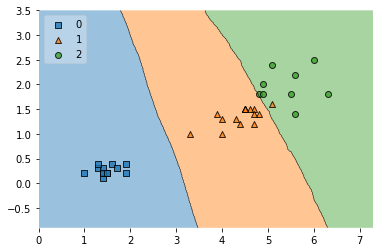

In [32]:
plot_decision_regions(X_test_petal, y_test, model_neigh_petal, legend=2)

In [33]:
y_spec_train = (y_train == 0)
y_spec_test = (y_test == 0)

In [34]:
model_sepal_spec = make_pipeline(StandardScaler(), LinearSVC())
model_sepal_spec = model_sepal_spec.fit(X_train_sepal, y_spec_train)
y_scores_LSVC_sepal_spec = cross_val_predict(model_sepal_spec, X_train_sepal, y_spec_train, method='decision_function')

In [35]:
test_model_neigh_sepal_spec = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 90)}#use gridsearch to test all values for n_neighbors
test_model_neigh_sepal_spec_gscv = GridSearchCV(test_model_neigh_sepal_spec, param_grid, cv=5)#fit model to data
test_model_neigh_sepal_spec_gscv.fit(X_train_sepal, y_spec_train)
test_model_neigh_sepal_spec_gscv.best_params_

{'n_neighbors': 7}

In [36]:
model_neigh_sepal_spec = KNeighborsClassifier(n_neighbors=7)
model_neigh_sepal_spec = model_neigh_sepal_spec.fit(X_train_sepal, y_spec_train)
y_scores_knn_sepal_spec = cross_val_predict(model_neigh_sepal_spec, X_train_sepal, y_spec_train, method='predict_proba')

In [37]:
fpr, tpr, thr = roc_curve(y_spec_train, y_scores_LSVC_sepal_spec)
fpr2, tpr2, thr2 = roc_curve(y_spec_train, y_scores_knn_sepal_spec[:, 1])

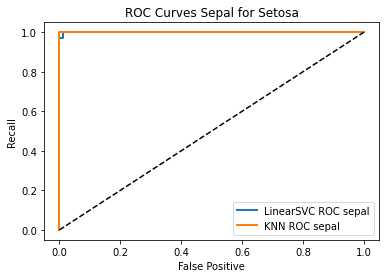

In [38]:
plt.plot(fpr, tpr, linewidth=2, label='LinearSVC ROC sepal')
plt.plot(fpr2, tpr2, linewidth=2, label='KNN ROC sepal')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive')
plt.ylabel('Recall')
plt.title('ROC Curves Sepal for Setosa')
plt.legend(loc='lower right')

In [39]:
model_petal_spec = make_pipeline(StandardScaler(), LinearSVC())
model_petal_spec = model_petal_spec.fit(X_train_petal, y_spec_train)
y_scores_LSVC_petal_spec = cross_val_predict(model_petal_spec, X_train_petal, y_spec_train, method='decision_function')

In [40]:
test_model_neigh_petal_spec = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 90)}#use gridsearch to test all values for n_neighbors
test_model_neigh_petal_spec_gscv = GridSearchCV(test_model_neigh_petal_spec, param_grid, cv=5)#fit model to data
test_model_neigh_petal_spec_gscv.fit(X_train_petal, y_spec_train)
test_model_neigh_petal_spec_gscv.best_params_

{'n_neighbors': 1}

In [41]:
model_neigh_petal_spec = KNeighborsClassifier(n_neighbors=1)
model_neigh_petal_spec = model_neigh_petal_spec.fit(X_train_petal, y_spec_train)
y_scores_knn_petal_spec = cross_val_predict(model_neigh_petal_spec, X_train_petal, y_spec_train, method='predict_proba')

In [42]:
fpr_, tpr_, thr_ = roc_curve(y_spec_train, y_scores_LSVC_petal_spec)
fpr_2, tpr_2, thr_2 = roc_curve(y_spec_train, y_scores_knn_petal_spec[:, 1])

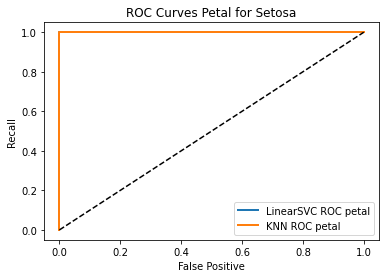

In [43]:
plt.plot(fpr_, tpr_, linewidth=2, label='LinearSVC ROC petal')
plt.plot(fpr_2, tpr_2, linewidth=2, label='KNN ROC petal')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive')
plt.ylabel('Recall')
plt.title('ROC Curves Petal for Setosa')
plt.legend(loc='lower right')